### Sample size effect in gene co-expression networks

- Author: Joaquim Aguirre Plans<br>
- Institution: Northeastern University

Load libraries:

In [3]:
import sys, os
import graph_tool.all as gt
import matplotlib.pyplot as plt
import multiprocessing as mp
import networkx as nx
import numpy as np
import pandas as pd
import pylab
import random
import seaborn as sns
import scipy
import time
import NetworkMedicineToolbox.wrappers as wrappers
import NetworkMedicineToolbox.network_utilities as network_utilities
random.seed(1510)

/home/j.aguirreplans/.conda/envs/ScipherSampleSizeEnv/lib/python3.7/site-packages/graph_tool/draw/cairo_draw.py:1494: RuntimeWarning: Error importing Gtk module: No module named 'gi'; GTK+ drawing will not work.
  warnings.warn(msg, RuntimeWarning)


GenRev not found, steiner wont work
Import error: Negex. Using keyword matching instead
Import error: Funcassociate. Make sure that funcassociate is in toolbox!
DIAMOnD not found and thus will not be available!


In [64]:
global_network_file = os.path.join(wto_results_dir, 'wto_RNAseq_NonResponders_all.net')

In [78]:
co = pd.read_csv(global_network_file)

In [91]:
co = co[co["wTO"] <= co["wTO"].quantile(0.001)]

In [94]:
g = gt.Graph(directed=False)
ids = g.add_edge_list(co[["Node.1", "Node.2"]].values, hashed=True)

In [96]:
pos = gt.sfdp_layout(g)

In [98]:
status = gt.minimize_blockmodel_dl(g)

In [100]:
blocks = status.get_blocks()

In [102]:
blocks[800]

20

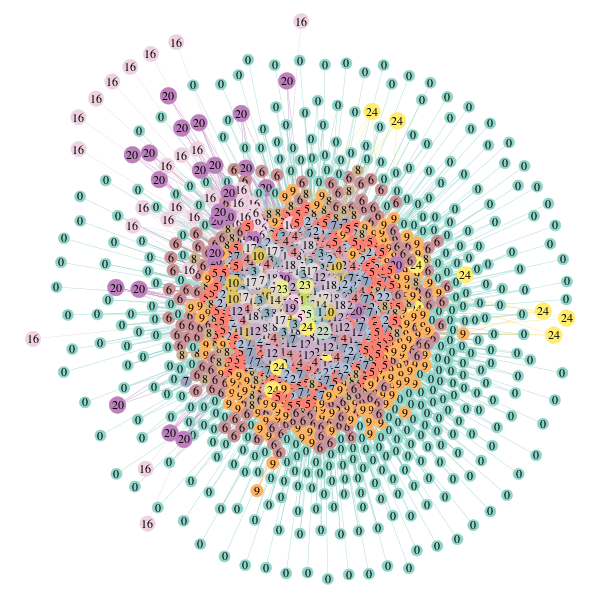

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2b08dd65da90, at 0x2b08dd66dd90>

In [103]:
status.draw(pos=pos, vertex_text=blocks)

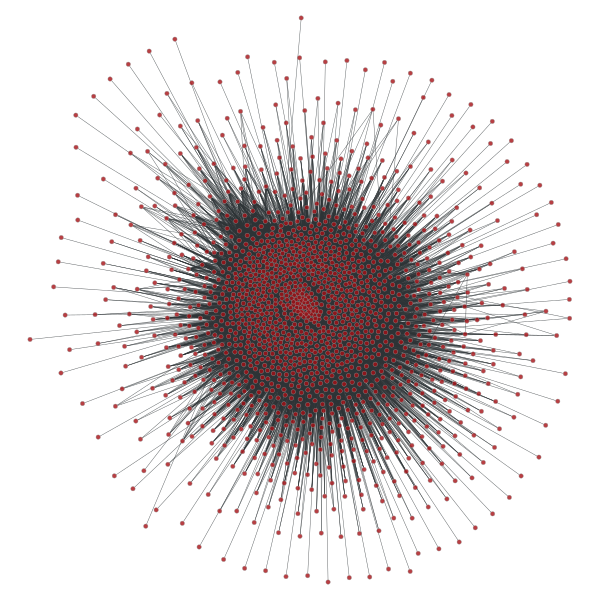

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2b08dd65da90, at 0x2b08dd66dd90>

In [97]:
gt.graph_draw(g, pos=pos)

In [95]:
g

<Graph object, undirected, with 1499 vertices and 50884 edges at 0x2b08dd65da90>

In [86]:
co.columns

Index(['Node.1', 'Node.2', 'wTO', 'pval', 'pval.adj'], dtype='object')

In [82]:
co["pval.adj"].describe()

count    4.999500e+07
mean     1.171433e-01
std      1.293683e-01
min      0.000000e+00
25%      0.000000e+00
50%      8.683945e-02
75%      1.885084e-01
max      9.500000e-01
Name: pval.adj, dtype: float64

In [ ]:
co 

In [75]:
VAL = 0.0001
co = co[co["pval.adj"] <= VAL]

In [4]:
df = pd.DataFrame({"source": ["pro1", "prot2", "prot3"],
                  "target": ["pro2", "prot3", "prot1"],
                "peso1": [1.4, 1.3, 9.8],
                  "peso2": ["si", "si", "no"]})

In [5]:
df

,source,target,peso1,peso2
0,pro1,pro2,1.4,si
1,prot2,prot3,1.3,si
2,prot3,prot1,9.8,no


# 1) Sin peso

In [8]:
edges = df[["source", "target"]].values

In [9]:
g = gt.Graph()
ids = g.add_edge_list(edges, hashed=True)

In [10]:
g

<Graph object, directed, with 5 vertices and 3 edges at 0x2b08a43e5090>

In [18]:
ids[3]

'prot3'

In [19]:
prot2id = {ids[v]: v for v in g.iter_vertices()}

In [21]:
prot2id

{'pro1': 0, 'pro2': 1, 'prot2': 2, 'prot3': 3, 'prot1': 4}

# 2) Con pesos

In [22]:
df

,source,target,peso1,peso2
0,pro1,pro2,1.4,si
1,prot2,prot3,1.3,si
2,prot3,prot1,9.8,no


In [23]:
edges = df.values

In [24]:
g = gt.Graph()
peso1 = g.new_edge_property("float")
peso2 = g.new_ep("string")
ids = g.add_edge_list(edges, hashed=True, eprops=[peso1, peso2])

In [52]:
# Aristas con peso1 mayor o igual a 1.4
filtro1 = g.new_ep("bool")
for edge in g.iter_edges():
    e = g.edge(*edge)
    if peso1[e] >= 1.4:
        filtro1[e] = 1
    else:
        filtro1[e] = 0

In [53]:
filtro1.a

PropertyArray([1, 0, 1], dtype=uint8)

In [55]:
h = gt.GraphView(g, efilt=filtro1)

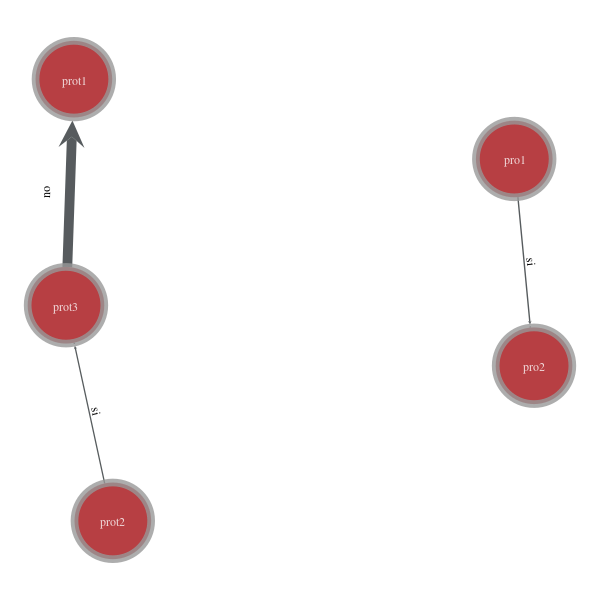

In [58]:
pos = gt.graph_draw(g, vertex_text=ids, edge_pen_width=peso1, edge_text=peso2)

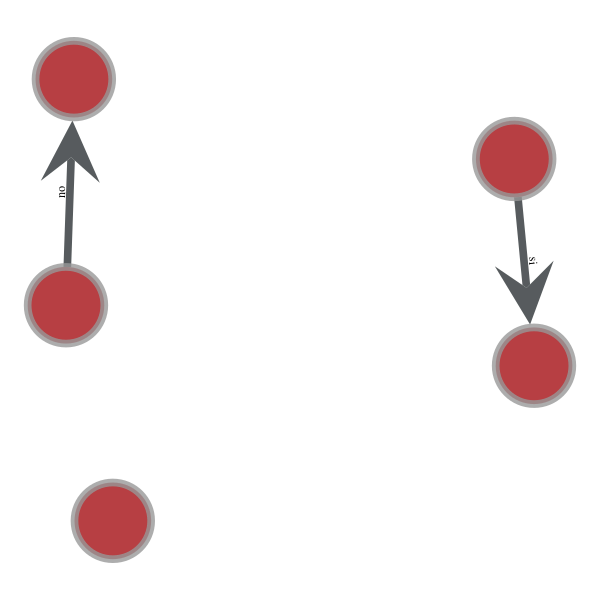

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2b08a5ae2650, at 0x2b08a6272a10>

In [62]:
gt.graph_draw(h, pos=pos, edge_text=peso2)